# Explorando Datos con *pandas*

La biblioteca [**pandas**](http://pandas.pydata.org/) de Python nos permite trabajar con tablas. Permite entre otras cosas:  

- Leer fácilmente archivos de texto organizados por columnas  
- Trabajar con datos faltantes  
- Hacer operaciones de bases de datos, como unir diferentes tablas por un ID  
- Trabajar en datos separados por grupos (*split-apply-combine*)  
- Obtener estadística y gráficos de los datos rápidamente  

En esta [*Cheat Sheet* de **pandas**](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) tienen un buen resumen de los métodos y operaciones básicas.  
*pandas* usa *matplotlib* para realizar sus gráficos. A su vez, cada una de sus series de datos son objetos de *numpy*  
Pero por el momento trataremos de mantenerlo simple, trabajando dentro de *pandas*, sin entrar demasiado en el mundo de *numpy* o *scipy*.

In [1]:
import pandas as pd

Usaremos los datos llamados *agriculture* de la biblioteca de *R cluster*. Contiene datos de Producto Nacional Bruto (*GNP* por *Gross National Product en inglés*) *per capita* y el porcentaje de la población trabajando en agricultura. Los datos son para los países de la Unión Europea en 1993. En los datos se observan dos clusters, donde los paises mas agrícolas son Grecia, Portugal, España e Irlanda.

In [2]:
! head -5 cluster_agriculture.txt

"country" "gnp" "population"
"B" 16.8 2.7
"DK" 21.3 5.7
"D" 18.7 3.5
"GR" 5.9 22.2


In [3]:
agricultura = pd.read_table("cluster_agriculture.txt", delimiter=" ")

In [4]:
type( agricultura )

pandas.core.frame.DataFrame

In [5]:
agricultura.head()

,country,gnp,population
0,B,16.8,2.7
1,DK,21.3,5.7
2,D,18.7,3.5
3,GR,5.9,22.2
4,E,11.4,10.9


Se puede fácilmente preguntarle a una columna de datos por toda una serie de [datos **estadísticos**.](http://pandas.pydata.org/pandas-docs/stable/api.html?highlight=stats#computations-descriptive-stats) Si usamos estos metodos para todo el *DataFrame*, obtendremos las respuestas para todas las columnas en las cuales tenga sentido.

In [6]:
agricultura.describe()

,gnp,population
count,12.000000,12.000000
mean,14.883333,8.416667
std,4.956508,6.443014
min,5.900000,2.300000
25%,11.275000,3.500000
50%,16.500000,5.850000
75%,18.025000,11.675000
max,21.300000,22.200000


In [9]:
%matplotlib inline

array([[<matplotlib.axes.AxesSubplot object at 0x7fa464e72390>,
        <matplotlib.axes.AxesSubplot object at 0x7fa464a30810>]], dtype=object)

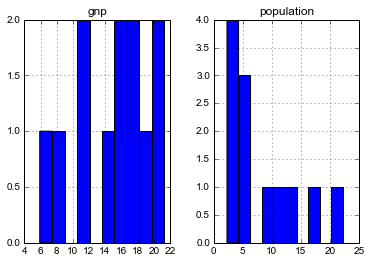

In [10]:
agricultura.hist(["gnp","population"])

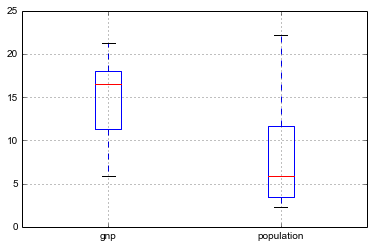

In [11]:
agricultura.boxplot(["gnp","population"]);

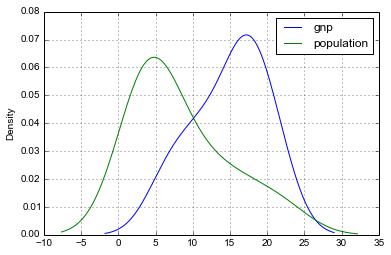

In [12]:
agricultura.plot(kind="density");

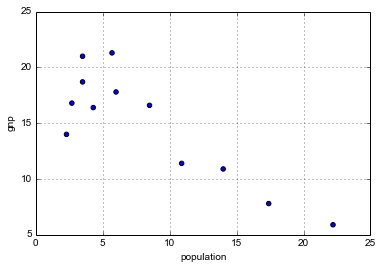

In [13]:
agricultura.plot(x="population",y="gnp",kind="scatter");

In [14]:
import matplotlib.pyplot as plt

Acá encontraran como colocar el [label de texto a cada punto](http://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point) en un gráfico de matplotlib.  
**Consejo:** Muchas veces que queremos hacer algo, pero no sabemos muy bien como... Si alguien ya lo preguntó, es muy probable que encuentres una respuesta en [**stackoverflow**.](http://stackoverflow.com/) Pueden entrar directamente a la página, o googlear para ver si hay un resultado de *stackoverflow* entre los primeros.

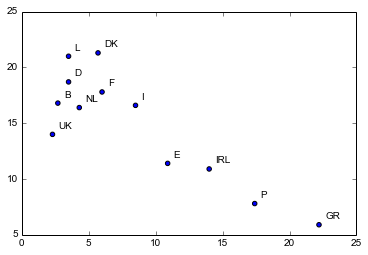

In [15]:
figura, eje = plt.subplots()
eje.scatter(agricultura["population"], agricultura["gnp"])

for i, txt in enumerate( agricultura.country ):
    eje.annotate(txt, (agricultura.population[i] + 0.5, agricultura.gnp[i] + 0.5) )

Es posible ne pandas hacer fácilmente una regresión de [cuadrados mínimos ordinarios (**OLS** por *Ordinary least squares*)](http://en.wikipedia.org/wiki/Ordinary_least_squares) usando *pandas.stats.api.ols*

In [16]:
res = pd.stats.api.ols(x=agricultura["population"], y=agricultura["gnp"])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         12
Number of Degrees of Freedom:   2

R-squared:         0.7456
Adj R-squared:     0.7201

Rmse:              2.6222

F-stat (1, 10):    29.3006, p-value:     0.0003

Degrees of Freedom: model 1, resid 10

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -0.6642     0.1227      -5.41     0.0003    -0.9048    -0.4237
     intercept    20.4740     1.2805      15.99     0.0000    17.9642    22.9839
---------------------------------End of Summary---------------------------------

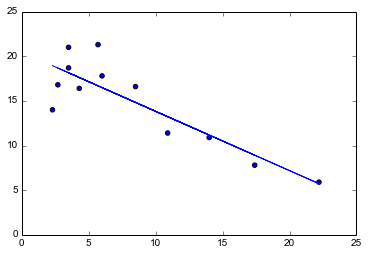

In [17]:
figura, eje = plt.subplots()

eje.scatter(agricultura["population"], agricultura["gnp"])

eje.plot(res.x["x"], res.predict()) # Regresion 

In [18]:
res.predict()

0     18.680576
1     16.687854
2     18.149184
3      5.727882
4     13.233802
5     16.488582
6     11.174656
7     14.827980
8     18.149184
9     17.617791
10     8.916238
11    18.946272
dtype: float64